In [7]:
import numpy as np
from numpy.typing import NDArray
from typing import Tuple
import matplotlib.pyplot as plt

In [8]:
Array2D = NDArray[np.floating]
Array1D = np.ndarray[Tuple[int], np.dtype[np.floating]]

$$||X|| = \max\limits_{1 \leq j \leq n} \Sigma_{i} |X_{ij}|$$

In [9]:
def normMat(X: Array2D) -> np.floating:
  return np.max([[np.sum([np.abs(X[i][j]) for i in range(len(X[j]))])] for j in range(len(X[0]))])

def normVec(x: Array1D) -> np.floating:
  return np.sum([np.abs(x[j]) for j in range(len(x))])

In [10]:
def getG(A:  NDArray[np.floating],
         x0: NDArray[np.floating],
         b:  NDArray[np.floating]) -> NDArray[np.floating]:
  g = A @ x0 - b
  return g

In [11]:
def inputMatrix(text: str) -> NDArray[np.floating]:
  n, m = map(int, input("Введите число строк и столбцов:").split()) # taking number of rows and column
  print(text)
  array = np.array([input().strip().split() for _ in range(n)], float)
  return array

def inputVector(text: str) -> NDArray[np.floating]:
  print(text)
  array = np.array(input().strip().split(), float)
  return array

In [12]:
A = inputMatrix("A: ")
assert(A.all)
# print(A)

b = inputVector("b: ")
assert(b.all)
# print(b)

x0 = inputVector("x0:")
if (x0.size == 0): x0 = np.zeros(len(b))
# print(x0)

x_ref = inputVector("x_ref: ")
if (x_ref.size == 0): x_ref = np.zeros(len(b))
# print(x_ref)

tolerance = float(input("Tolerance: ") or 1e-4)
# print(tolerance)


A: 
b: 
x0:
x_ref: 


In [13]:
MaxItNum = 100

In [ ]:
x = x0
g = getG(A, x, b)
i = 0

graph_data = list()
while(normVec(g) > tolerance and i < MaxItNum):
  mu = (g.T @ g) / (g.T @ A @ g)
  x = x - mu * g
  g = getG(A, x, b)
  i += 1
  graph_data.append(np.abs(x - x_ref))
  if (True): print(str(i) + ":", x)


1: [ -70.32902489 -424.96041858  284.30236879]
2: [-122.53178468 -154.7386346  -175.64217074]
3: [ 41.51202796  70.90977068 -61.69022573]
4: [52.08945786 26.70121727 10.62471058]
5: [21.98984872 -7.70553869 -6.00665859]
6: [ 22.63871781  -2.10319787 -18.77103638]
7: [ 24.7102469    9.11274028 -13.74300757]
8: [28.57915123  5.01266595 -6.1910158 ]
9: [14.57142951 -7.79841419 -5.97012647]
10: [ 11.85801444  -5.17178131 -25.70289925]
11: [ 44.08160237  74.97399957 -19.46568285]
12: [ 85.1469565   48.99480139 102.19917955]
13: [-175.40434823 -419.186467     90.17152976]
14: [-403.11140104 -274.24625053 -618.93829858]
15: [1087.26401792 2475.55982046 -535.46957399]
16: [2432.53762756 1620.02849914 3628.75485157]
17: [ -6339.33956518 -14514.19200573   3147.8114902 ]
18: [-14227.31730589  -9497.30750719 -21285.72819544]
19: [ 37228.4051073   85179.41818533 -18457.62365712]
20: [ 83519.15443577  55738.0705327  124919.83728439]
21: [-218434.92558737 -499824.28401433  108328.50012266]
22: [-4900

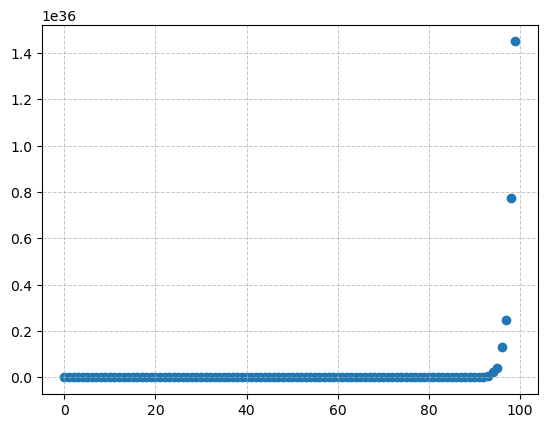

In [15]:
plt.xlabel("", fontsize=12)
plt.ylabel(r"", fontsize=12)

plt.grid(True, which="both", ls="--", linewidth=0.7, alpha=0.7)
plt.scatter(range(len(graph_data)), [normVec(d) for d in graph_data])

plt.title(r"", fontsize=14)
plt.show()